<a href="https://colab.research.google.com/github/anuradha-datascience/machine-learning/blob/main/supervisedlearning_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load Data

In [4]:
df=pd.read_csv("creditcard_sampledata.csv")


In [5]:
df.shape

(5723, 32)

In [6]:
df.head()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,64,1.212511,-0.099054,-1.192094,0.286324,2.160516,3.616314,-0.404207,0.842331,...,-0.167496,-0.494695,-0.149785,1.011227,0.883548,-0.329434,0.020370,0.017037,34.70,0.0
1,1,64,-0.658305,0.406791,2.037461,-0.291298,0.147910,-0.350857,0.945373,-0.172560,...,-0.156096,-0.238805,0.089877,0.421195,-0.352487,0.074783,-0.094192,-0.092493,54.99,0.0
2,2,124,1.105253,0.541842,0.839421,2.570933,-0.279517,-0.423062,0.088019,0.011622,...,-0.137434,-0.460991,0.189397,0.556329,0.185786,-0.189030,0.000208,0.026167,6.24,0.0
3,3,128,1.239495,-0.182609,0.155058,-0.928892,-0.746227,-1.235608,-0.061695,-0.125223,...,0.146077,0.481119,-0.140019,0.538261,0.710720,-0.621382,0.036867,0.010963,8.80,0.0
4,4,132,-1.571359,1.687508,0.734670,1.293350,-0.217532,-0.002677,0.147364,0.515362,...,0.048549,0.377256,-0.030436,0.117608,-0.060520,-0.296550,-0.481570,-0.167897,10.00,0.0


# Initial EDA

In [7]:
# Count the occurrences of fraud - 1 and no fraud -0 and print them
occ = df['Class'].value_counts()
print(occ)

0.0    5708
1.0      14
Name: Class, dtype: int64


In [8]:
# Print the ratio of fraud cases
print(occ / len(df))

0.0    0.997379
1.0    0.002446
Name: Class, dtype: float64


In [10]:
# create- Features X and target y
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [9]:
# Visualize Fraud To Non- Fraud Data

In [24]:
X[y == 0].iloc[:, 1]

0           64
1           64
2          124
3          128
4          132
         ...  
5717    134665
5718    134681
5719    134736
5720    134748
5721    134774
Name: Time, Length: 5708, dtype: int64

In [23]:
X[y == 0].iloc[:, 2]

0       1.212511
1      -0.658305
2       1.105253
3       1.239495
4      -1.571359
          ...   
5717   -0.457778
5718    1.722190
5719    2.254294
5720    0.039663
5721   -1.381210
Name: V1, Length: 5708, dtype: float64

In [ ]:
plt.scatter(X[y == 0].iloc[:, 1])

Take any 2 features for fraud and non-fraud case and plot a scotter plaot between them to visualize

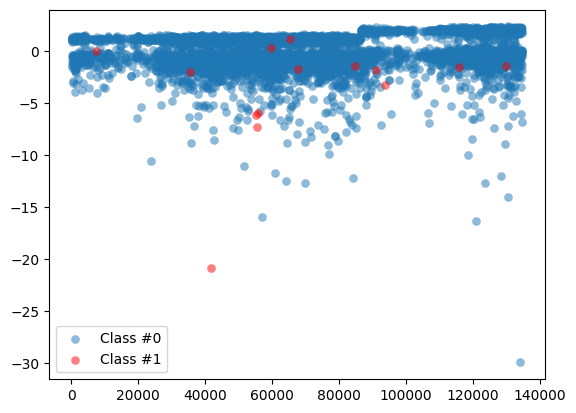

In [32]:
plt.scatter(X[y == 0].iloc[:, 1], X[y == 0].iloc[:, 2], label="Class #0", alpha=0.5, linewidth=0.15)
plt.scatter(X[y == 1].iloc[:, 1], X[y == 1].iloc[:, 2], label="Class #1", alpha=0.5, linewidth=0.15,c='r')
plt.legend()

# Applying SMOTE

This dataset is imbalnaced as number of fraud cases is very less as compared to non-fraud case

Imbalance dataset needs to be balanced before training the model - Imbalanced data can lead to biased models.

To balance , we will use Synthetic Minority Over-sampling Technique (SMOTE) which creates new, synthetic, samples that are quite similar to the existing observations in the minority class.